<a href="https://colab.research.google.com/github/lmartins30/SENAC-SP/blob/main/End_to_end_TravelChurn_Senac_SJRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Abrindo o Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Customertravel.csv to Customertravel.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Customertravel.csv']))
# Dataset is now stored in a Pandas Dataframe

## Estrutura dos dados

In [ ]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [ ]:
df["FrequentFlyer"].value_counts()

No           608
Yes          286
No Record     60
Name: FrequentFlyer, dtype: int64

In [ ]:
df["AnnualIncomeClass"].value_counts()

Middle Income    409
Low Income       386
High Income      159
Name: AnnualIncomeClass, dtype: int64

In [ ]:
df["AccountSyncedToSocialMedia"].value_counts()

No     594
Yes    360
Name: AccountSyncedToSocialMedia, dtype: int64

In [ ]:
df["BookedHotelOrNot"].value_counts()

No     576
Yes    378
Name: BookedHotelOrNot, dtype: int64

In [ ]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


Saving figure attribute_histogram_plots


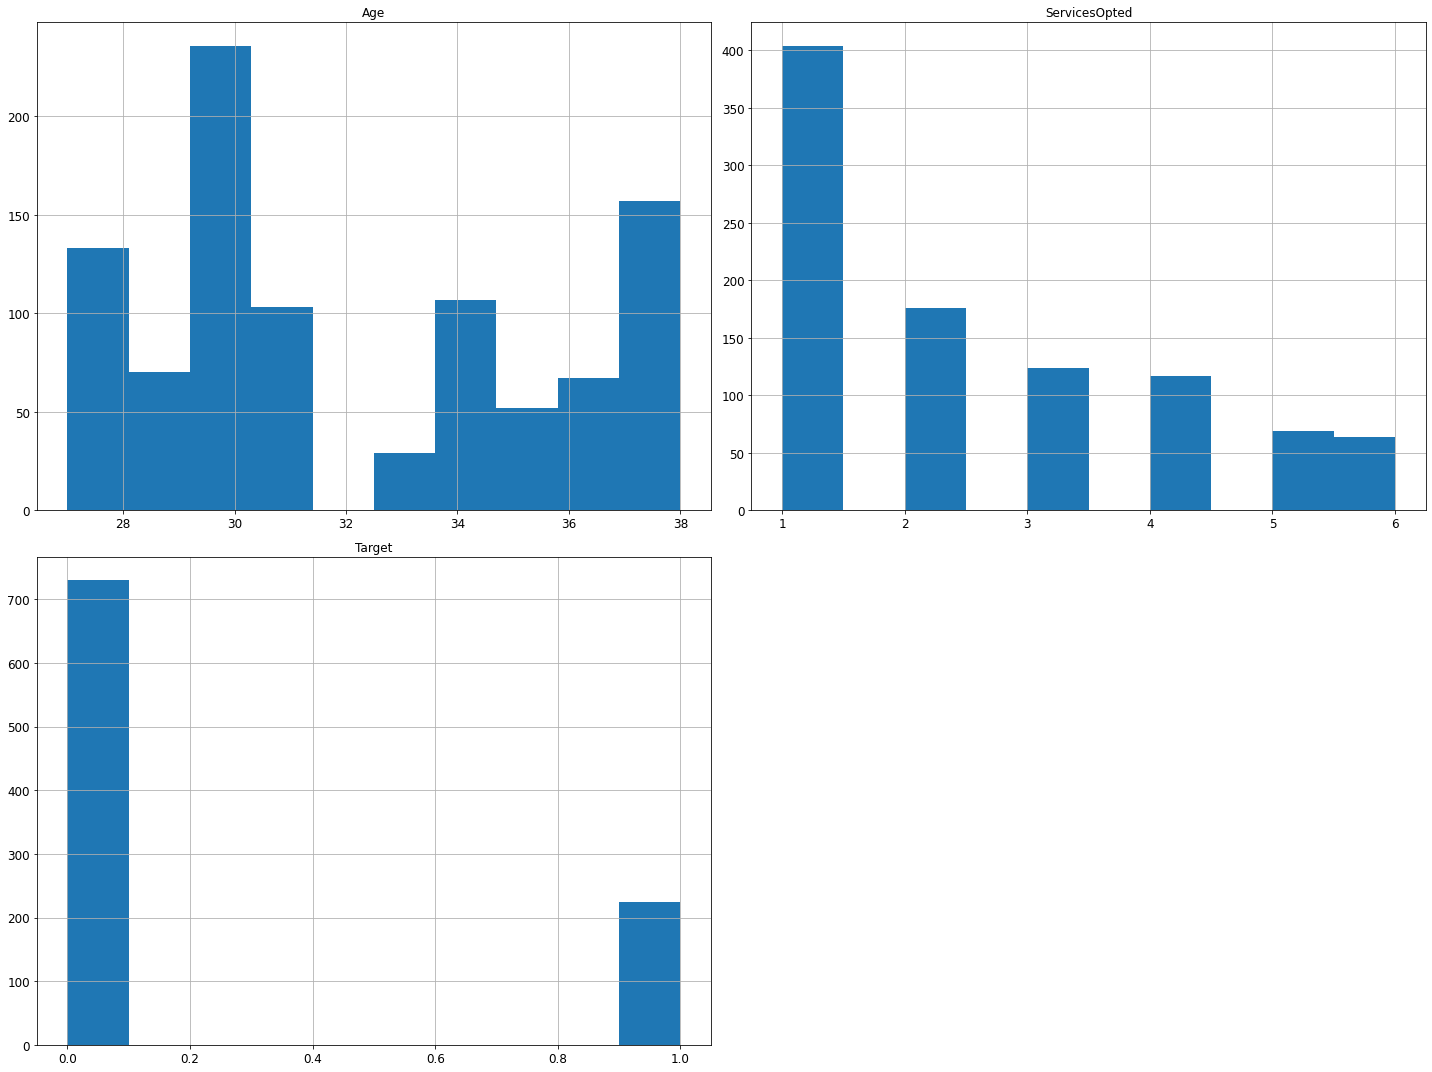

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Looking for Correlations

In [ ]:
corr_matrix = df.corr()

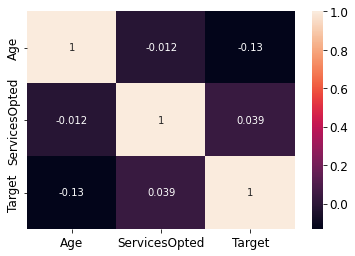

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix,annot=True)

In [ ]:
corr_matrix["Target"].sort_values(ascending=False)

Target           1.000000
ServicesOpted    0.038646
Age             -0.131534
Name: Target, dtype: float64

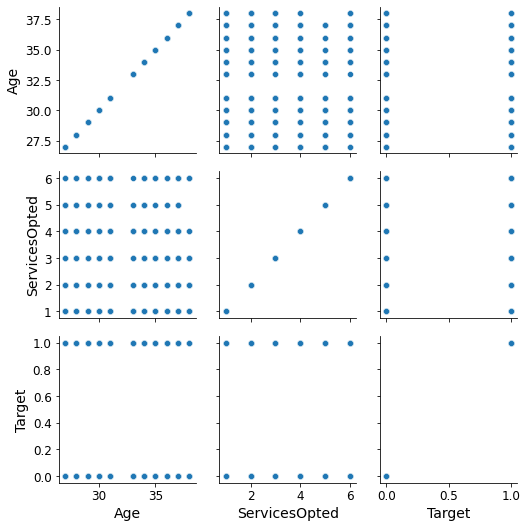

In [ ]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [ ]:
df_freq_norm= pd.crosstab(df['Age'],df['Target'], normalize='index')
round(df_freq_norm*100,0)

Target,0,1
Age,,
27,44.0,56.0
28,44.0,56.0
29,81.0,19.0
30,86.0,14.0
31,85.0,15.0
33,72.0,28.0
34,81.0,19.0
35,75.0,25.0
36,76.0,24.0


In [ ]:
df_freq_norm= pd.crosstab(df['FrequentFlyer'],df['Target'], normalize='index')
round(df_freq_norm*100,0)

Target,0,1
FrequentFlyer,,
No,89.0,11.0
No Record,87.0,13.0
Yes,49.0,51.0


In [ ]:
df_freq_norm= pd.crosstab(df['AnnualIncomeClass'],df['Target'], normalize='index')
round(df_freq_norm*100,0)

Target,0,1
AnnualIncomeClass,,
High Income,42.0,58.0
Low Income,73.0,27.0
Middle Income,93.0,7.0


In [ ]:
df_freq_norm= pd.crosstab(df['ServicesOpted'],df['Target'], normalize='index')
round(df_freq_norm*100,0)

Target,0,1
ServicesOpted,,
1,77.0,23.0
2,70.0,30.0
3,92.0,8.0
4,81.0,19.0
5,62.0,38.0
6,67.0,33.0


In [ ]:
df_freq_norm= pd.crosstab(df['AccountSyncedToSocialMedia'],df['Target'], normalize='index')
round(df_freq_norm*100,0)

Target,0,1
AccountSyncedToSocialMedia,,
No,79.0,21.0
Yes,72.0,28.0


In [ ]:
df_freq_norm= pd.crosstab(df['BookedHotelOrNot'],df['Target'], normalize='index')
round(df_freq_norm*100,0)

Target,0,1
BookedHotelOrNot,,
No,69.0,31.0
Yes,87.0,13.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df_num=pd.get_dummies(df,drop_first=True)

In [ ]:
df_num.head(2)

,Age,ServicesOpted,Target,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
0,34,6,0,0,0,0,1,0,1
1,34,5,1,0,1,1,0,1,0


In [ ]:
corr_matrix_num = df_num.corr()

In [ ]:
corr_matrix_num["Target"].sort_values(ascending=False)

Target                             1.000000
FrequentFlyer_Yes                  0.430973
AccountSyncedToSocialMedia_Yes     0.073831
AnnualIncomeClass_Low Income       0.067348
ServicesOpted                      0.038646
FrequentFlyer_No Record           -0.062015
Age                               -0.131534
BookedHotelOrNot_Yes              -0.206055
AnnualIncomeClass_Middle Income   -0.339959
Name: Target, dtype: float64

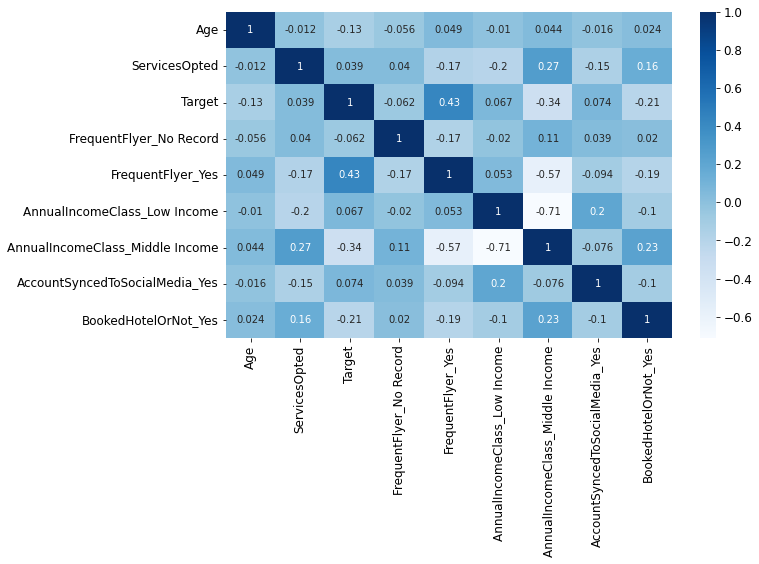

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix_num,annot=True,cmap='Blues')

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(df_num.drop(columns='Target'), df_num['Target'], random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(2, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
17/17 [==============================] - 1s 13ms/step - loss: 0.6487 - accuracy: 0.6996 - val_loss: 0.6372 - val_accuracy: 0.7151
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6186 - accuracy: 0.7612 - val_loss: 0.6172 - val_accuracy: 0.7151
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.7687 - val_loss: 0.6035 - val_accuracy: 0.7151
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 0.5826 - accuracy: 0.7649 - val_loss: 0.5921 - val_accuracy: 0.7151
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5567 - accuracy: 0.7668 - val_loss: 0.5825 - val_accuracy: 0.7151
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5520 - accuracy: 0.7668 - val_loss: 0.5742 - val_accuracy: 0.7151
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5418 - accuracy: 0.7668 - val_loss: 0.5668 - val_accuracy: 0.7151
Epoch 8/50
17/17 [=

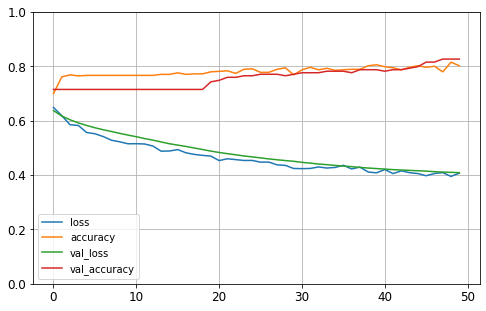

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8285


[0.3634549379348755, 0.8284518718719482]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 120)               1080      
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense_5 (Dense)             (None, 80)                9680      
                                                                 
 dropout_4 (Dropout)         (None, 80)                0         
                                                                 
 dense_6 (Dense)             (None, 30)                2430      
                                                                 
 dropout_5 (Dropout)         (None, 30)               

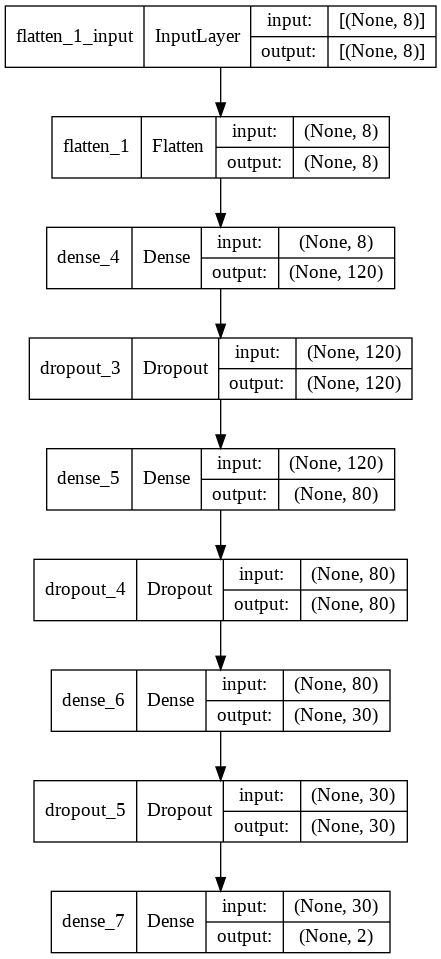

In [ ]:
keras.utils.plot_model(model, "Travel_Churn.png", show_shapes=True)